# Demo kernel PCA

Adapted by <alberto.suarez@uam.es>  from

[Kernel PCA (sklearn)](https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py)   
Authors: Mathieu Blondel, Andreas Mueller
          
License: [BSD 3 clause](https://opensource.org/licenses/BSD-3-Clause)	
 


In [13]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn import datasets
import kernel_machine_learning as kpca

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Input data

np.random.seed(0) # for reproductible results
# X, y = datasets.make_circles(n_samples=400, factor=.3, noise=.05)
X, y = datasets.make_moons(n_samples=400, noise=.05)


In [15]:
# Principal componets

# PCA (linear)

X_pca, eigenvals_pca, eigenvecs_pca = kpca.kernel_pca(X, X, kpca.linear_kernel)

# Kernel PCA

A = 1.0
gamma = 20.0
L = np.sqrt(0.5 / gamma)
def rbf_kernel (X, X_prime):
    return kpca.rbf_kernel(X, X_prime, A, L)

X_kpca, eigenvals_kpca, eigenvecs_kpca = kpca.kernel_pca(X, X, rbf_kernel)

# PCA (sklearn)
pca = PCA()
X_pca_sk = pca.fit_transform(X)

# Kernel PCA (sklearn)

kernel_pca = KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma=gamma)
X_kpca_sk = kernel_pca.fit_transform(X)
X_back = kernel_pca.inverse_transform(X_kpca_sk)

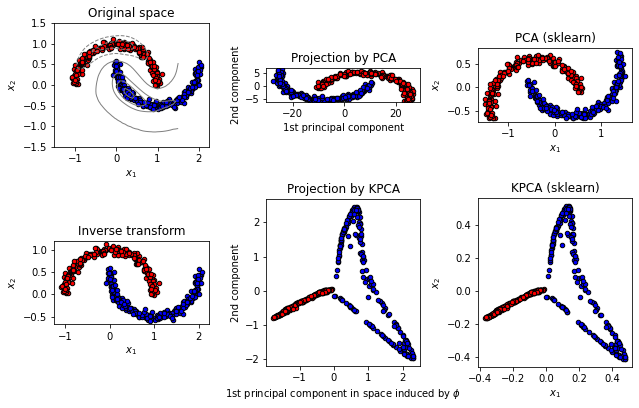

In [16]:
# Plot results

plt.figure(figsize=(9,6))
plt.subplot(2, 3, 1, aspect='equal')
plt.title('Original space')
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c='red',
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c='blue',
            s=20, edgecolor='k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T

# projection on the first principal component (in the phi space)
Z_grid = kernel_pca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')


plt.subplot(2, 3, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


plt.subplot(2, 3, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 3, 5, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 3, 3, aspect='equal')
plt.scatter(X_pca_sk[reds, 0], X_pca_sk[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca_sk[blues, 0], X_pca_sk[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("PCA (sklearn)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


plt.subplot(2, 3, 6, aspect='equal')
plt.scatter(X_kpca_sk[reds, 0], X_kpca_sk[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca_sk[blues, 0], X_kpca_sk[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("KPCA (sklearn)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.tight_layout()
plt.show()

## Exercises
1. Implement the function **kernel_pca** del fichero *kernel_machine_learning.py*.
2. Why do the projections onto the first two KPCA principal components look different for the sklearn and our implementation? Is any of the two incorrect?

Normalización?

3. Vary the parameters of the kernel and comment on the behavior of the projections onto the first two KPCA components for the different values considered (e.g. $\gamma \in \left\{0.02, 0.2, 2.0, 20.0, 200.0, 2000.0\right\}$). In particular,
    1. What is the behaviour in the limit in which the width of the kernel approaches $\infty$. Explain why one should expect such behavior.
    2. What is the behaviour in the limit in which the width of the kernel approaches $0$. Explain why one should expect such behavior.
4. (Extra point) Make an animation that shows the evolution of the projections onto the first two KPCA components with $ 0.002 < \gamma < 20000.0$. 

In [42]:
import matplotlib.animation as anim
from IPython.display import HTML
def animate_pca(X, X_test, kernel):

    fig = plt.figure(figsize=(20,10))
    gammas = [0.02, 0.2, 2, 20, 200, 2000]
    A = 1.0
    frames = len(gammas)

    def init():
        """Initialize figure labels, titles and limits.
        Also clear any previous plots.
        """
        plt.title("Projection by KPCA")
        plt.xlabel(r"0st principal component in space induced by $\phi$")
        plt.ylabel("1nd component")

    def update(i):
        """Update output in animation by advancing frames."""
        gamma = gammas[i]
        L = np.sqrt(0.5 / gamma)
        def rbf_kernel (X, X_prime):
            return kpca.rbf_kernel(X, X_prime, A, L)
        X_kpca, eigenvals_kpca, eigenvecs_kpca = kpca.kernel_pca(X, X, rbf_kernel)

        # Set labels and limits
        fig.clear()
        init()

        plt.subplot(2, 3, 5, aspect='equal')
        plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
                    s=20, edgecolor='k')
        plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
                    s=20, edgecolor='k')


    return anim.FuncAnimation(fig, update, frames=frames, repeat=False)

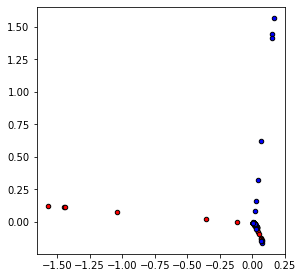

In [46]:
animation = animate_pca(X, X, rbf_kernel)
HTML(animation.to_jshtml())
